# 1. 데이터 로드
  - 제출용 예시 output은 가장 row가 적은 4번 카테고리 dataset에 대해 진행.
  - 타 dataset(3만개 데이터)은 summary와 sentiment analysis 진행 시 colab gpu 사용시 5시간가량 소요

In [1]:
import pandas as pd
import ast
import warnings
warnings.filterwarnings(action='ignore')

file_path = './splited_dataset/'
file_name = 'sentiment_0_summary_0_sample_total_df_04_10.csv'

total_df = pd.read_csv(file_path + file_name) # 02: beaty and sopa
total_df

,review_id,user_id,business_id,review_star,useful,funny,cool,text,date,mean,...,Mass Media,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,summary,sentiment_score
0,_qafm0NudWVBOwouhKH2iw,vJ4ZWjXVjR_wo-NSBjC1Gw,yl_gnP_iQp2TaOTnMPHh0w,5,0,0,0,I recently contracted Cory to make cookies as ...,2016-07-25 14:23:46,4.00,...,False,closed,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,closed,I was expecting a simple standard sugar cookie...,0.477661
1,zdATrLC7YC7p4IryVwJIbQ,_HUZkkvxE_A6GZVC379KgA,SLmGshQmUoMPMlwbMuLWLQ,4,1,0,0,Great new spot in Malvern! So nice to see a ch...,2018-09-15 02:31:56,3.75,...,False,closed,14:0-20:0,14:0-20:0,14:0-20:0,14:0-21:0,14:0-21:0,closed,Chicken albondigas and calamari were excellent...,0.993008
2,QuZPjzI9Mi9ddTeOpzQn8Q,Sifz5dluWUZwQVCCRvQI8A,RYDx_QT3rxN8jsr9Y2Ioqg,5,0,0,0,I ordered a cake as part of a big surprise fro...,2017-07-20 04:16:29,5.00,...,False,closed,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,9:0-15:0,closed,Customer service was amazing. Not to mention t...,0.992071
3,pQNg9P5nO91shiJ5ezr3Lg,4MVeKvtezN4BZr0jEIEUYQ,kpdGKJimp87LPV-mk1lIrg,5,0,0,0,I cannot believe that there would be a single ...,2012-10-13 14:47:53,5.00,...,False,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,I have never had a better tasting cupcake and ...,0.992044
4,dr5Gst3YsN8zGUSrBz9DzQ,vtLgcu1t6209CKwo-nAZ0Q,rxH22mT81ht_n3cGTbWi4A,5,1,1,0,Me and my now husband chose Beans BBQ to cater...,2018-05-28 20:29:36,5.00,...,False,0:0-0:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,Beans BBQ Catering in Santa Barbara cater our ...,0.992734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,-WrCTfVzxvd59VBAXT27Dg,dq6bYzoDqY33KfFDHAI0gA,CJVD_c7YhF0jAESny1uHGA,5,0,0,0,Absolutely spectacular service and food was gr...,2021-06-20 21:57:20,4.90,...,False,no information,no information,no information,no information,no information,no information,no information,Staff were friendly and on top of food and dri...,0.992297
1841,NtroZQuDLFIc4p9cZ4B4_g,NYTfKhsTWaMSR5XyyC9zlQ,1ahT3QimUngu6fzXjCtn5A,5,0,0,0,I could not have asked for anything more! We h...,2019-08-20 15:40:12,5.00,...,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,Florida Wedding Professionals was the perfect ...,0.965868
1842,vZw6RsryDYpuS6_MxQn1uw,uisOWRYZgPO_9Nt_agOH_g,yiasXNMo_K1rI1BvUtG62w,5,0,0,0,"Our officiant, Juanita, was absolutely amazing...",2021-08-24 15:35:40,5.00,...,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,Juanita was absolutely amazing! She sent out P...,0.991619
1843,anpWuE2wtSX8QNq_r-ExGg,4STLpZ3BB2o-rWNzzWsaBg,1ahT3QimUngu6fzXjCtn5A,1,0,0,0,If I could give them a zero I would! This plac...,2020-07-06 17:40:52,1.00,...,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,Jason Wheeler will ignore you after he gets yo...,0.019370


In [2]:
try:
    total_df = total_df.drop('Unnamed: 0', axis=1)
except:
    print('No index column')

total_df

No index column


,review_id,user_id,business_id,review_star,useful,funny,cool,text,date,mean,...,Mass Media,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,summary,sentiment_score
0,_qafm0NudWVBOwouhKH2iw,vJ4ZWjXVjR_wo-NSBjC1Gw,yl_gnP_iQp2TaOTnMPHh0w,5,0,0,0,I recently contracted Cory to make cookies as ...,2016-07-25 14:23:46,4.00,...,False,closed,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,closed,I was expecting a simple standard sugar cookie...,0.477661
1,zdATrLC7YC7p4IryVwJIbQ,_HUZkkvxE_A6GZVC379KgA,SLmGshQmUoMPMlwbMuLWLQ,4,1,0,0,Great new spot in Malvern! So nice to see a ch...,2018-09-15 02:31:56,3.75,...,False,closed,14:0-20:0,14:0-20:0,14:0-20:0,14:0-21:0,14:0-21:0,closed,Chicken albondigas and calamari were excellent...,0.993008
2,QuZPjzI9Mi9ddTeOpzQn8Q,Sifz5dluWUZwQVCCRvQI8A,RYDx_QT3rxN8jsr9Y2Ioqg,5,0,0,0,I ordered a cake as part of a big surprise fro...,2017-07-20 04:16:29,5.00,...,False,closed,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,9:0-15:0,closed,Customer service was amazing. Not to mention t...,0.992071
3,pQNg9P5nO91shiJ5ezr3Lg,4MVeKvtezN4BZr0jEIEUYQ,kpdGKJimp87LPV-mk1lIrg,5,0,0,0,I cannot believe that there would be a single ...,2012-10-13 14:47:53,5.00,...,False,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,I have never had a better tasting cupcake and ...,0.992044
4,dr5Gst3YsN8zGUSrBz9DzQ,vtLgcu1t6209CKwo-nAZ0Q,rxH22mT81ht_n3cGTbWi4A,5,1,1,0,Me and my now husband chose Beans BBQ to cater...,2018-05-28 20:29:36,5.00,...,False,0:0-0:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,Beans BBQ Catering in Santa Barbara cater our ...,0.992734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,-WrCTfVzxvd59VBAXT27Dg,dq6bYzoDqY33KfFDHAI0gA,CJVD_c7YhF0jAESny1uHGA,5,0,0,0,Absolutely spectacular service and food was gr...,2021-06-20 21:57:20,4.90,...,False,no information,no information,no information,no information,no information,no information,no information,Staff were friendly and on top of food and dri...,0.992297
1841,NtroZQuDLFIc4p9cZ4B4_g,NYTfKhsTWaMSR5XyyC9zlQ,1ahT3QimUngu6fzXjCtn5A,5,0,0,0,I could not have asked for anything more! We h...,2019-08-20 15:40:12,5.00,...,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,Florida Wedding Professionals was the perfect ...,0.965868
1842,vZw6RsryDYpuS6_MxQn1uw,uisOWRYZgPO_9Nt_agOH_g,yiasXNMo_K1rI1BvUtG62w,5,0,0,0,"Our officiant, Juanita, was absolutely amazing...",2021-08-24 15:35:40,5.00,...,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,Juanita was absolutely amazing! She sent out P...,0.991619
1843,anpWuE2wtSX8QNq_r-ExGg,4STLpZ3BB2o-rWNzzWsaBg,1ahT3QimUngu6fzXjCtn5A,1,0,0,0,If I could give them a zero I would! This plac...,2020-07-06 17:40:52,1.00,...,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,Jason Wheeler will ignore you after he gets yo...,0.019370


# 2. 데이터셋 준비

## 2.1. 'text' 칼럼 및 'summary' 칼럼 삭제
- ML모델의 input으로 제공하기 위해 'sentiment_score'로 변환하였기 때문

In [3]:
final_df = total_df.drop(['text','summary'], axis=1)
final_df

,review_id,user_id,business_id,review_star,useful,funny,cool,date,mean,var,...,Lawn Services,Mass Media,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,sentiment_score
0,_qafm0NudWVBOwouhKH2iw,vJ4ZWjXVjR_wo-NSBjC1Gw,yl_gnP_iQp2TaOTnMPHh0w,5,0,0,0,2016-07-25 14:23:46,4.00,4.000000,...,False,False,closed,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,closed,0.477661
1,zdATrLC7YC7p4IryVwJIbQ,_HUZkkvxE_A6GZVC379KgA,SLmGshQmUoMPMlwbMuLWLQ,4,1,0,0,2018-09-15 02:31:56,3.75,3.583333,...,False,False,closed,14:0-20:0,14:0-20:0,14:0-20:0,14:0-21:0,14:0-21:0,closed,0.993008
2,QuZPjzI9Mi9ddTeOpzQn8Q,Sifz5dluWUZwQVCCRvQI8A,RYDx_QT3rxN8jsr9Y2Ioqg,5,0,0,0,2017-07-20 04:16:29,5.00,0.000000,...,False,False,closed,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,9:0-15:0,closed,0.992071
3,pQNg9P5nO91shiJ5ezr3Lg,4MVeKvtezN4BZr0jEIEUYQ,kpdGKJimp87LPV-mk1lIrg,5,0,0,0,2012-10-13 14:47:53,5.00,0.000000,...,False,False,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,0.992044
4,dr5Gst3YsN8zGUSrBz9DzQ,vtLgcu1t6209CKwo-nAZ0Q,rxH22mT81ht_n3cGTbWi4A,5,1,1,0,2018-05-28 20:29:36,5.00,0.000000,...,False,False,0:0-0:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,0.992734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,-WrCTfVzxvd59VBAXT27Dg,dq6bYzoDqY33KfFDHAI0gA,CJVD_c7YhF0jAESny1uHGA,5,0,0,0,2021-06-20 21:57:20,4.90,0.100000,...,False,False,no information,no information,no information,no information,no information,no information,no information,0.992297
1841,NtroZQuDLFIc4p9cZ4B4_g,NYTfKhsTWaMSR5XyyC9zlQ,1ahT3QimUngu6fzXjCtn5A,5,0,0,0,2019-08-20 15:40:12,5.00,0.000000,...,False,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0.965868
1842,vZw6RsryDYpuS6_MxQn1uw,uisOWRYZgPO_9Nt_agOH_g,yiasXNMo_K1rI1BvUtG62w,5,0,0,0,2021-08-24 15:35:40,5.00,0.000000,...,False,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0.991619
1843,anpWuE2wtSX8QNq_r-ExGg,4STLpZ3BB2o-rWNzzWsaBg,1ahT3QimUngu6fzXjCtn5A,1,0,0,0,2020-07-06 17:40:52,1.00,0.000000,...,False,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0.019370


## 2.2. id 칼럼 및 의미없는 칼럼 제거

In [4]:
remove_col = ['review_id','user_id','business_id','date','name','is_open']

final_df = final_df.drop(remove_col, axis = 1)
final_df

,review_star,useful,funny,cool,mean,var,num_review,address,city,state,...,Lawn Services,Mass Media,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,sentiment_score
0,5,0,0,0,4.00,4.000000,4,6815 State Road 54,New Port Richey,FL,...,False,False,closed,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,closed,0.477661
1,4,1,0,0,3.75,3.583333,4,625 N Morehall Rd,Malvern,PA,...,False,False,closed,14:0-20:0,14:0-20:0,14:0-20:0,14:0-21:0,14:0-21:0,closed,0.993008
2,5,0,0,0,5.00,0.000000,1,6861 Jefferson Hwy,New Orleans,LA,...,False,False,closed,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,9:0-15:0,closed,0.992071
3,5,0,0,0,5.00,0.000000,3,114 3rd Ave S,Franklin,TN,...,False,False,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,0.992044
4,5,1,1,0,5.00,0.000000,5,NaN,Santa Barbara,CA,...,False,False,0:0-0:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,0.992734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,5,0,0,0,4.90,0.100000,10,5801 E 116th St,Carmel,IN,...,False,False,no information,no information,no information,no information,no information,no information,no information,0.992297
1841,5,0,0,0,5.00,0.000000,1,NaN,Dunedin,FL,...,False,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0.965868
1842,5,0,0,0,5.00,0.000000,1,NaN,Goleta,CA,...,False,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0.991619
1843,1,0,0,0,1.00,0.000000,1,NaN,Dunedin,FL,...,False,False,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0.019370


In [5]:
final_df = final_df.replace(False, 0)
final_df = final_df.replace('False', 0)
final_df = final_df.replace(True, 1)
final_df = final_df.replace('True', 1)

final_df

,review_star,useful,funny,cool,mean,var,num_review,address,city,state,...,Lawn Services,Mass Media,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,sentiment_score
0,5,0,0,0,4.00,4.000000,4,6815 State Road 54,New Port Richey,FL,...,0,0,closed,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,closed,0.477661
1,4,1,0,0,3.75,3.583333,4,625 N Morehall Rd,Malvern,PA,...,0,0,closed,14:0-20:0,14:0-20:0,14:0-20:0,14:0-21:0,14:0-21:0,closed,0.993008
2,5,0,0,0,5.00,0.000000,1,6861 Jefferson Hwy,New Orleans,LA,...,0,0,closed,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,9:0-15:0,closed,0.992071
3,5,0,0,0,5.00,0.000000,3,114 3rd Ave S,Franklin,TN,...,0,0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,0.992044
4,5,1,1,0,5.00,0.000000,5,NaN,Santa Barbara,CA,...,0,0,0:0-0:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,8:0-20:0,0.992734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,5,0,0,0,4.90,0.100000,10,5801 E 116th St,Carmel,IN,...,0,0,no information,no information,no information,no information,no information,no information,no information,0.992297
1841,5,0,0,0,5.00,0.000000,1,NaN,Dunedin,FL,...,0,0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0.965868
1842,5,0,0,0,5.00,0.000000,1,NaN,Goleta,CA,...,0,0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0.991619
1843,1,0,0,0,1.00,0.000000,1,NaN,Dunedin,FL,...,0,0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0.019370


# 3. pycaret 모델 준비

## 3.1. dataset 준비

In [6]:
for idx, value in enumerate(final_df.iloc[0]):
    if type(value)== str:
        print(final_df.columns[idx],value, type(value))

address 6815 State Road 54 <class 'str'>
city New Port Richey <class 'str'>
state FL <class 'str'>
RestaurantsPriceRange2 2 <class 'str'>
WiFi u'free' <class 'str'>
Monday closed <class 'str'>
Tuesday 10:0-18:0 <class 'str'>
Wednesday 10:0-18:0 <class 'str'>
Thursday 10:0-18:0 <class 'str'>
Friday 10:0-18:0 <class 'str'>
Saturday 10:0-18:0 <class 'str'>
Sunday closed <class 'str'>


In [7]:
import pandas as pd

# Identify object type columns
object_columns = final_df.select_dtypes(include='object').columns

# Convert object columns to numeric or categorical
for column in object_columns:
    try:
        final_df[column] = pd.to_numeric(final_df[column], errors='coerce')
    except ValueError:
        final_df[column] = final_df[column].astype('category')

In [8]:
final_df.dtypes

review_star          int64
useful               int64
funny                int64
cool                 int64
mean               float64
                    ...   
Thursday           float64
Friday             float64
Saturday           float64
Sunday             float64
sentiment_score    float64
Length: 557, dtype: object

In [9]:
for idx, value in enumerate(final_df.iloc[0]):
    if type(value)== str:
        print(final_df.columns[idx],value, type(value))

### 3.2. pycaret Model load

In [10]:
# # 파이캐럿 사용
# !pip install pycaret
# !pip install Jinja2
# !pip install markupsafe==2.1.1

In [11]:
# !pip install xgboost

In [12]:
# !pip install catboost

In [13]:
from pycaret.regression import *

setup_clf = setup(data=final_df, target='review_star', train_size=0.7,
                 fold=5,fold_shuffle=True,
                  feature_selection = True,feature_selection_method = 'classic',
                  use_gpu = True,
                 session_id = 123)

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,123
1,Target,review_star
2,Target type,Regression
3,Original data shape,"(1845, 557)"
4,Transformed data shape,"(1845, 112)"
5,Transformed train set shape,"(1291, 112)"
6,Transformed test set shape,"(554, 112)"
7,Numeric features,556
8,Rows with missing values,100.0%
9,Preprocess,True


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


In [14]:
models()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [15]:
top5 = compare_models(n_select=5, fold=5)
top5

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2692,0.2742,0.5209,0.8466,0.1393,0.1120,0.5920
catboost,CatBoost Regressor,0.2870,0.2827,0.5292,0.8421,0.1428,0.1199,7.3340
rf,Random Forest Regressor,0.2740,0.2875,0.5329,0.8400,0.1434,0.1167,0.8000
gbr,Gradient Boosting Regressor,0.2983,0.2936,0.5368,0.8360,0.1455,0.1230,0.6560
lightgbm,Light Gradient Boosting Machine,0.2937,0.3019,0.5455,0.8311,0.1455,0.1195,0.3900
xgboost,Extreme Gradient Boosting,0.2882,0.3064,0.5473,0.8295,0.1465,0.1165,1.0900
omp,Orthogonal Matching Pursuit,0.4241,0.4140,0.6405,0.7702,0.1752,0.1748,0.4320
br,Bayesian Ridge,0.4314,0.4177,0.6431,0.7682,0.1759,0.1770,0.4560
ridge,Ridge Regression,0.4307,0.4181,0.6434,0.7680,0.1758,0.1761,0.4300
lr,Linear Regression,0.4306,0.4184,0.6436,0.7678,0.1755,0.1751,0.7820


[ExtraTreesRegressor(n_jobs=-1, random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 GradientBoostingRegressor(random_state=123),
 LGBMRegressor(random_state=123)]

In [16]:
# 파라미터 튜닝
tuned_top5 = [tune_model(i) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4262,0.3623,0.6019,0.7734,0.1589,0.1607
1,0.5252,0.5747,0.7581,0.7253,0.2088,0.2477
2,0.4505,0.4389,0.6625,0.7529,0.1889,0.2070
3,0.4839,0.4507,0.6714,0.7395,0.1733,0.1800
4,0.5462,0.6552,0.8095,0.6416,0.2108,0.2269
Mean,0.4864,0.4964,0.7007,0.7265,0.1881,0.2044
Std,0.0447,0.1046,0.0738,0.0453,0.0201,0.0313


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3041,0.2917,0.5401,0.8175,0.1415,0.1087
1,0.3135,0.3000,0.5477,0.8566,0.1534,0.1451
2,0.2875,0.2721,0.5217,0.8468,0.1450,0.1287
3,0.2847,0.2369,0.4867,0.8631,0.1307,0.1079
4,0.3566,0.4061,0.6373,0.7779,0.1710,0.1522
Mean,0.3093,0.3014,0.5467,0.8324,0.1483,0.1285
Std,0.0259,0.0567,0.0499,0.0314,0.0135,0.0182


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4283,0.3790,0.6156,0.7629,0.1644,0.1676
1,0.5165,0.5797,0.7614,0.7229,0.2104,0.2463
2,0.4300,0.4368,0.6609,0.7541,0.1868,0.1971
3,0.4648,0.4116,0.6416,0.7621,0.1632,0.1667
4,0.5702,0.7155,0.8459,0.6086,0.2193,0.2367
Mean,0.4820,0.5045,0.7051,0.7221,0.1888,0.2029
Std,0.0545,0.1258,0.0860,0.0586,0.0230,0.0335


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2911,0.3196,0.5654,0.8001,0.1565,0.1081
1,0.2781,0.2578,0.5078,0.8768,0.1367,0.1221
2,0.2432,0.2391,0.4890,0.8654,0.1322,0.1046
3,0.2748,0.2390,0.4889,0.8619,0.1289,0.1013
4,0.3642,0.4392,0.6628,0.7597,0.1743,0.1566
Mean,0.2903,0.2990,0.5427,0.8328,0.1457,0.1185
Std,0.0402,0.0761,0.0662,0.0453,0.0172,0.0203


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3378,0.3330,0.5770,0.7917,0.1526,0.1232
1,0.3945,0.3830,0.6189,0.8169,0.1739,0.1817
2,0.3330,0.2945,0.5426,0.8342,0.1553,0.1465
3,0.3736,0.3159,0.5620,0.8174,0.1496,0.1370
4,0.4534,0.5388,0.7340,0.7053,0.1973,0.1937
Mean,0.3785,0.3730,0.6069,0.7931,0.1657,0.1564
Std,0.0438,0.0879,0.0683,0.0460,0.0179,0.0269


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [17]:
# 앙상블
blender_top5 = blend_models(estimator_list=tuned_top5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2805,0.2986,0.5464,0.8132,0.1455,0.1046
1,0.2839,0.2511,0.5011,0.8800,0.1362,0.1264
2,0.2300,0.2222,0.4714,0.8749,0.1311,0.1054
3,0.2353,0.1881,0.4337,0.8913,0.1143,0.0887
4,0.3304,0.3758,0.6130,0.7945,0.1633,0.1451
Mean,0.2720,0.2671,0.5131,0.8508,0.1381,0.1140
Std,0.0367,0.0653,0.0621,0.0391,0.0162,0.0196


In [18]:
final_model = finalize_model(blender_top5)
prediction = predict_model(final_model, data=final_df.iloc[-100:])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0949,0.0306,0.1749,0.9834,0.0445,0.0315


In [19]:
save_model(final_model, file_path+'model_'+file_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['useful', 'funny', 'cool', 'mean',
                                              'var', 'num_review', 'address',
                                              'city', 'state', 'postal_code',
                                              'latitude', 'longitude',
                                              'business_star', 'review_count',
                                              'ByAppointmentOnly',
                                              'BusinessAcceptsCreditCards',
                                              'BikeParking',
                                              'RestaurantsPriceRange2',
                                              'CoatCheck...
                                               ExtraTreesRegressor(n_jobs=-1,
                                                                   random_state=123)),
                  

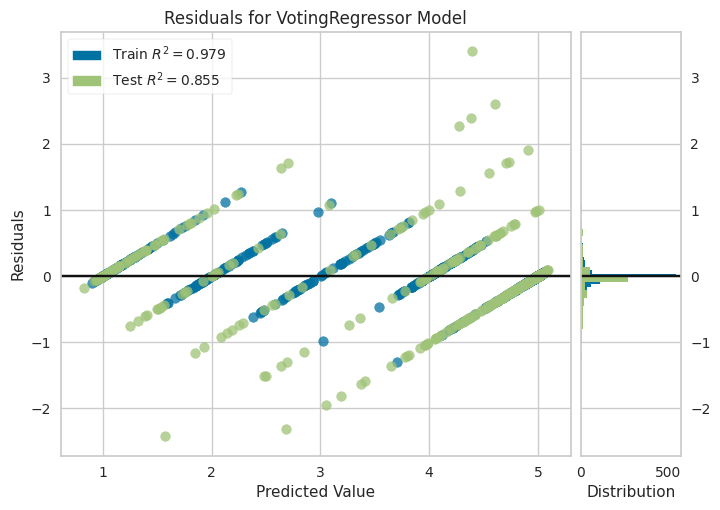

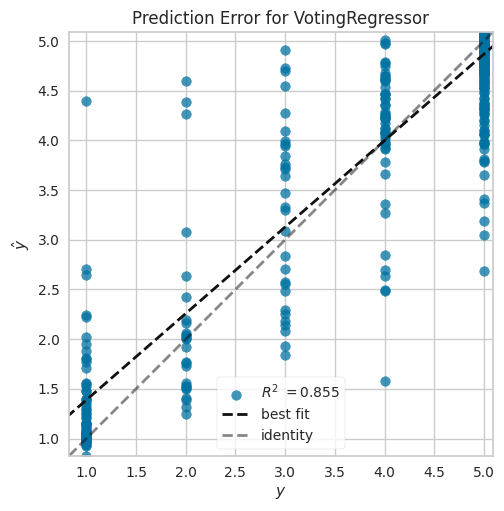

In [20]:
# 모델 시각화(plot)_plot = 'residuals'

plot_model(blender_top5)

# 모델 시각화(plot)_plot = 'error'

plot_model(blender_top5, plot='error')